In [1]:
#importar 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#ler dados
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
dados_cancer = cancer['data']

In [9]:
nome_colunas_dados_cancer = cancer['feature_names']

In [10]:
cancer_df = pd.DataFrame(dados_cancer, columns=nome_colunas_dados_cancer)

In [123]:
cancer_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

Fiz uma análise e encontrei as mais relevantes e representando 72% da amostra e precisei de 3 componentes principais

mean concave points

mean concavity

worst concave points

mean compactness

worst perimeter

mean fractal dimension

fractal dimension error

worst fractal dimension

compactness error

In [137]:
dados_cancer = cancer['data']
novo_data_frame_que_sera_usado_em_outro_algoritmo_com_dados_originais = cancer_df[['mean concave points', 
                                                                    'mean concavity', 
                                                                    'worst concave points',
                                                                    'mean compactness',
                                                                    'worst perimeter',
                                                                    'mean fractal dimension',
                                                                    'fractal dimension error',
                                                                    'worst fractal dimension',
                                                                    'compactness error']]

In [138]:
novo_data_frame_que_sera_usado_em_outro_algoritmo_com_dados_originais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
mean concave points        569 non-null float64
mean concavity             569 non-null float64
worst concave points       569 non-null float64
mean compactness           569 non-null float64
worst perimeter            569 non-null float64
mean fractal dimension     569 non-null float64
fractal dimension error    569 non-null float64
worst fractal dimension    569 non-null float64
compactness error          569 non-null float64
dtypes: float64(9)
memory usage: 40.1 KB


In [129]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [14]:
# normalização dos dados é importante antes de aplicar o PCA
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(cancer_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
dados_cancer_normalizado = scaler.transform(cancer_df)

In [18]:
# verificando quantidade de dados em linhas e colunas
dados_cancer_normalizado.shape

(569, 30)

In [19]:
# import
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=2)

In [26]:
pca.fit(dados_cancer_normalizado)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [32]:
componentes_pca = pca.transform(dados_cancer_normalizado)

In [33]:
primeiro_componente_principal=componentes_pca[:,0]
primeiro_componente_principal.shape

(569,)

In [34]:
segundo_componente_principal=componentes_pca[:,1]
segundo_componente_principal.shape

(569,)

In [35]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

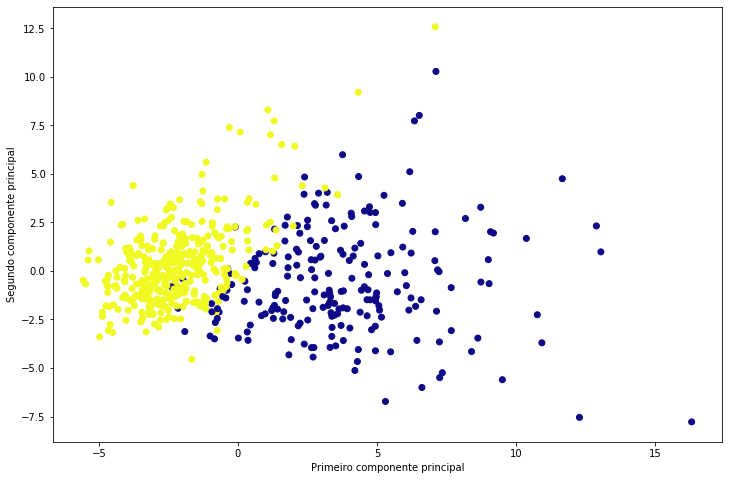

In [36]:
plt.figure(figsize=(12,8))
plt.scatter(primeiro_componente_principal, segundo_componente_principal, c=cancer['target'], cmap='plasma')
plt.xlabel('Primeiro componente principal')
plt.ylabel('Segundo componente principal')
plt.show()

In [50]:
print('Toda as representatividades de amostras ', pca.explained_variance_ratio_)

Toda as representatividades de amostras  [0.44272026 0.18971182]


In [51]:
print('O percentual representado nesta análise PCA é de ', np.sum(pca.explained_variance_ratio_))

O percentual representado nesta análise PCA é de  0.6324320765155945


In [118]:
print('valor máximo do primeiro componente principal: ', componentes_pca[:,0].max())
print('valor mínimo do primeiro componente principal: ', componentes_pca[:,0].min())
print('valor máximo do primeiro componente principal: ', componentes_pca[:,1].max())
print('valor mínimo do primeiro componente principal: ', componentes_pca[:,1].min())

valor máximo do primeiro componente principal:  16.319233231041512
valor mínimo do primeiro componente principal:  -5.565735898987973
valor máximo do primeiro componente principal:  12.573194245428448
valor mínimo do primeiro componente principal:  -7.775852820450788


In [120]:
componentes_pca[:,0].shape

(569,)

In [77]:
#indice_maior_valor =  np.where(componentes_pca == 16.319233231032005)[0][0]
#list(cancer['target'])[indice_maior_valor ]

In [79]:
nome_das_colunas=cancer['feature_names']
componentes_pca_df = pd.DataFrame(pca.components_, columns=nome_das_colunas)

In [80]:
# onde para cada compoenente principal os maiores valores são as variáveis mais representativas
componentes_pca_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.218902      0.103725        0.227537   0.220995         0.142590   
1    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.239285        0.258400             0.260854       0.138167   
1          0.151892        0.060165            -0.034768       0.190349   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.064363  ...      0.227997       0.104469         0.236640   
1                0.366575  ...     -0.219866      -0.045467        -0.199878   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.224871          0.127953           0.210096         0.228768   
1   -0.219352          0.172304           0.143593         0.097964   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.250886        0.122905                 0.131784  
1             -0.008257        0.141883                 0.275339  

[2 rows x 30 columns]

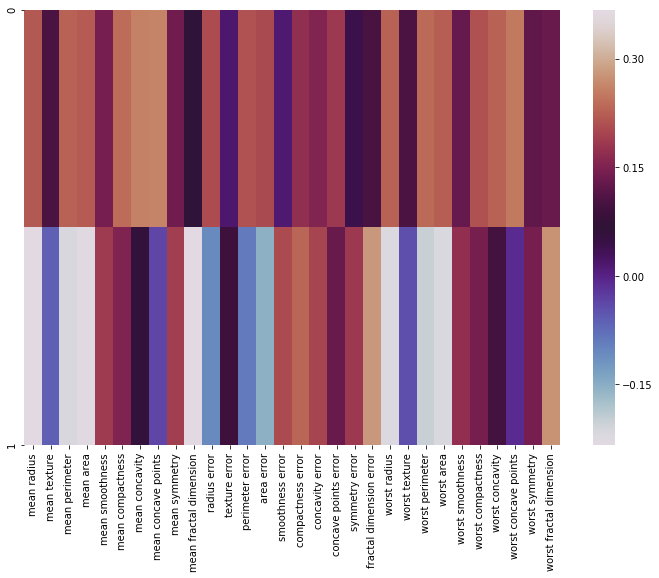

In [81]:
plt.figure(figsize=(12,8))
sns.heatmap(componentes_pca_df, cmap='twilight')

Text(0, 0.5, 'Segundo componente principal')

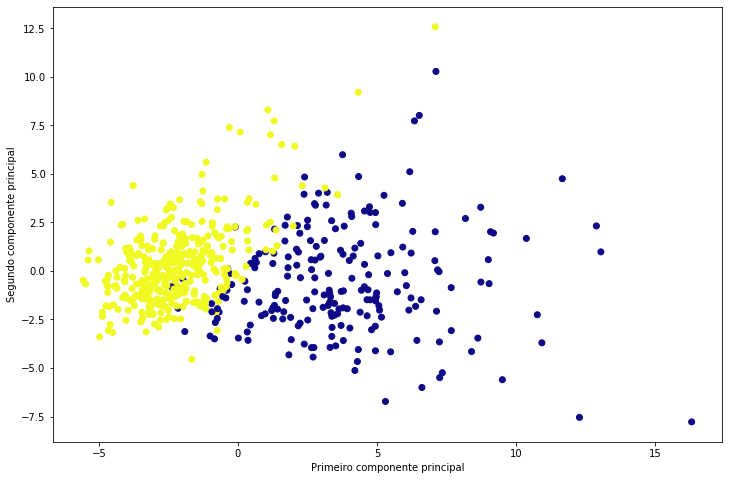

In [82]:
plt.figure(figsize=(12,8))
plt.scatter(primeiro_componente_principal, segundo_componente_principal, c=cancer['target'], cmap='plasma')
plt.xlabel('Primeiro componente principal')
plt.ylabel('Segundo componente principal')

In [83]:
print('taxa de variância de cada componente principal ' , pca.explained_variance_ratio_)
print('total de variância representada pelos componentes principais ', np.sum(pca.explained_variance_ratio_ ))

taxa de variância de cada componente principal  [0.44272026 0.18971182]
total de variância representada pelos componentes principais  0.6324320765155945


In [84]:
componentes_pca.shape

(569, 2)

In [122]:
limiar=0.23

def retornar_features_relevantes(comp_pca_df, parametro_componente_pca, parametro_limiar):
    principal_componente  = comp_pca_df.max().sort_values(ascending=False)
    return principal_componente[principal_componente >= parametro_limiar]

def principais_colunas_features(parametro_componentes_pca, parametro_componentes_pca_df, parametro_limiar):
    lista_features=[]
    for i in range(parametro_componentes_pca.shape[1]):
        componente_principal_i=componentes_pca[:,0]
        lista_features.append('PC'+str(i))
        features_pc = retornar_features_relevantes(parametro_componentes_pca_df, componente_principal_i, parametro_limiar)
        lista_features.append(features_pc)
    return lista_features

pc0=componentes_pca[:,0]
pc1=componentes_pca[:,1]

relacao_com_pc0=componentes_pca_df[0:1]
relacao_com_pc1=componentes_pca_df[1:2]

features_pc0 = retornar_features_relevantes(relacao_com_pc0, pc0, limiar)
print('\nFeatures mais importantes do primeiro componente principal\n', features_pc0)

features_pc1 = retornar_features_relevantes(relacao_com_pc1, pc1, limiar)
print('\n\nFeatures mais importantes do segundo componente principal\n', features_pc1)


Features mais importantes do primeiro componente principal
 mean concave points     0.260854
mean concavity          0.258400
worst concave points    0.250886
mean compactness        0.239285
worst perimeter         0.236640
dtype: float64


Features mais importantes do segundo componente principal
 mean fractal dimension     0.366575
fractal dimension error    0.280092
worst fractal dimension    0.275339
compactness error          0.232716
dtype: float64


In [98]:
principais_features_cada_componente_principal = principais_colunas_features(componentes_pca, componentes_pca_df, limiar)

print('\n\n\nTodas\n',principais_features_cada_componente_principal)




Todas
 ['PC0', mean fractal dimension     0.366575
fractal dimension error    0.280092
worst fractal dimension    0.275339
mean concave points        0.260854
mean concavity             0.258400
worst concave points       0.250886
mean compactness           0.239285
worst perimeter            0.236640
compactness error          0.232716
dtype: float64, 'PC1', mean fractal dimension     0.366575
fractal dimension error    0.280092
worst fractal dimension    0.275339
mean concave points        0.260854
mean concavity             0.258400
worst concave points       0.250886
mean compactness           0.239285
worst perimeter            0.236640
compactness error          0.232716
dtype: float64]


In [108]:
limiar=0.23
aux=componentes_pca_df.T
aux[(aux >=limiar)].dropna(thresh=1).fillna('')

0         1
mean compactness         0.239285          
mean concavity             0.2584          
mean concave points      0.260854          
mean fractal dimension             0.366575
compactness error                  0.232716
fractal dimension error            0.280092
worst perimeter           0.23664          
worst concave points     0.250886          
worst fractal dimension            0.275339

In [115]:
pca = PCA(n_components=0.95)
pca.fit(dados_cancer_normalizado)
componentes_pca = pca.transform(dados_cancer_normalizado)
componentes_pca_df = pd.DataFrame(pca.components_, columns=cancer.feature_names)

print('representatividade da amostra',np.sum(pca.explained_variance_ratio_), ' através de ',pca.n_components_, ' componentes principais')

print('Toda as representatividades de amostras ',pca.explained_variance_ratio_)

principais_features_cada_componente_principal = principais_colunas_features(componentes_pca, componentes_pca_df, limiar)

print('\n\n\nTodas\n',principais_features_cada_componente_principal)

representatividade da amostra 0.9515688143366665  através de  10  componentes principais
Toda as representatividades de amostras  [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]



Todas
 ['PC0', smoothness error           0.573410
mean symmetry              0.572069
worst symmetry             0.498927
symmetry error             0.490246
worst fractal dimension    0.374658
texture error              0.374634
fractal dimension error    0.367542
mean fractal dimension     0.366575
concavity error            0.358107
area error                 0.346679
perimeter error            0.314640
radius error               0.312490
compactness error          0.279968
concave points error       0.272520
mean concave points        0.260854
mean concavity             0.258400
worst concave points       0.250886
mean texture               0.240934
mean compactness           0.239285
worst perimeter            0.236640
dtype: float64, 'PC

representatividade da amostra 0.7263637090897099  através de  3  componentes principais
Toda as representatividades de amostras  [0.44272026 0.18971182 0.09393163]



Todas
 ['PC0', texture error              0.374634
mean fractal dimension     0.366575
smoothness error           0.308839
symmetry error             0.288584
fractal dimension error    0.280092
worst fractal dimension    0.275339
radius error               0.268481
perimeter error            0.266645
mean concave points        0.260854
mean concavity             0.258400
worst concave points       0.250886
mean compactness           0.239285
worst perimeter            0.236640
compactness error          0.232716
dtype: float64, 'PC1', texture error              0.374634
mean fractal dimension     0.366575
smoothness error           0.308839
symmetry error             0.288584
fractal dimension error    0.280092
worst fractal dimension    0.275339
radius error               0.268481
perimeter error            0.266645
mea

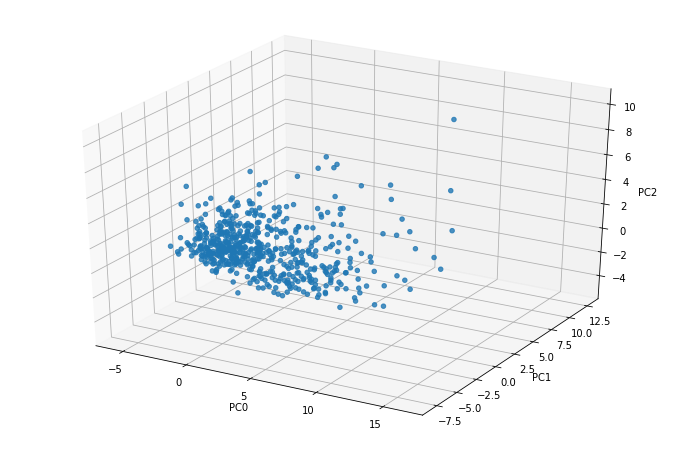

In [116]:
pca = PCA(n_components=3)
pca.fit(dados_cancer_normalizado)
componentes_pca = pca.transform(dados_cancer_normalizado)
componentes_pca_df = pd.DataFrame(pca.components_, columns=cancer.feature_names)

print('representatividade da amostra',np.sum(pca.explained_variance_ratio_), ' através de ',pca.n_components_, ' componentes principais')

print('Toda as representatividades de amostras ',pca.explained_variance_ratio_)

principais_features_cada_componente_principal = principais_colunas_features(componentes_pca, componentes_pca_df, limiar)

print('\n\n\nTodas\n',principais_features_cada_componente_principal)


# `ax` é uma instância de eixo com reconhecimento 3D devido ao argumento de palavra-chave projection = '3d' para add_subplot


from mpl_toolkits.mplot3d.axes3d import Axes3D

x=componentes_pca[:,0]
y=componentes_pca[:,1]
z=componentes_pca[:,2]

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
sctt = ax.scatter3D(x, y, z, 
              marker='o', alpha = 0.8, cmap=plt.get_cmap('hsv'))
ax.set_xlabel('PC0')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')

plt.show()
